In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import Point
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import font_manager as fm

font_path = './Data/fonts/OPTIFranklinGothic-Medium.otf'

prop = fm.FontProperties(fname=font_path)

/home/aleksei/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: >

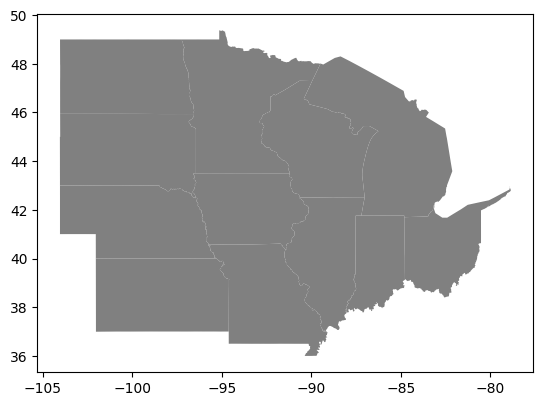

In [12]:
shape = gpd.read_file('./Data/gadm41_USA_shp/gadm41_USA_1.shp')

states = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 
          'Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio']
shape = shape[shape.NAME_1.isin(states)]
shape.plot(color='grey')

In [3]:
shape.to_file('MidWest.shp', driver='ESRI Shapefile')

# Initial Analysis

In [3]:
df = pd.read_csv('./Data/AmeriFlux_SiteList.tsv', sep='\t')
df['geometry'] = df.apply(lambda row: Point(row['Longitude (degrees)'], row['Latitude (degrees)']), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')
df.crs = shape.crs

In [4]:
drop=[]
for i, row in df.iterrows():
    point = row.geometry
    if shape.geometry.contains(point).any()==False:
        drop.append(i)
df = df.drop(drop, axis=0)

In [78]:
df['Vegetation Abbreviation (IGBP)'].unique()

array(['WET', 'CRO', 'ENF', 'GRA', 'DBF', 'MF', 'WAT', 'OSH'],
      dtype=object)

In [86]:
forests = len(df[(df['Vegetation Abbreviation (IGBP)']=='ENF')|(df['Vegetation Abbreviation (IGBP)']=='MF')|\
              (df['Vegetation Abbreviation (IGBP)']=='DBF')])
aqua = len(df[(df['Vegetation Abbreviation (IGBP)']=='WET')|(df['Vegetation Abbreviation (IGBP)']=='WAT')])
gsh = len(df[(df['Vegetation Abbreviation (IGBP)']=='GRA')|(df['Vegetation Abbreviation (IGBP)']=='OSH')])
cro = len(df[(df['Vegetation Abbreviation (IGBP)']=='CRO')])

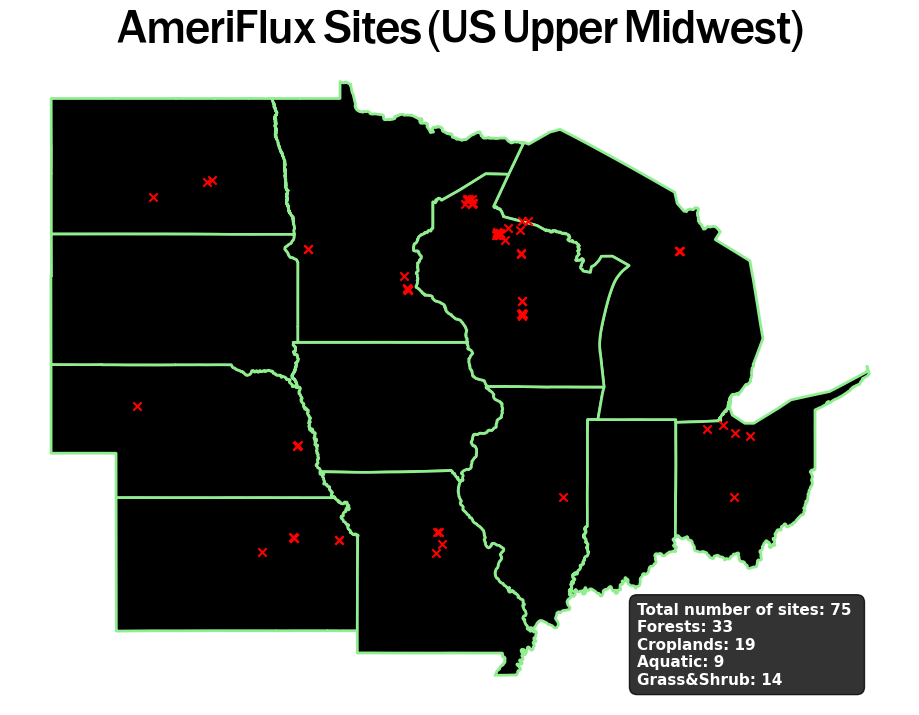

In [143]:
fig, ax = plt.subplots(figsize=(9,9))
shape.plot(color='black', edgecolor="lightgreen", lw=2, ax=ax)
df.plot(ax=ax, color='r', marker='x')
ax.set_facecolor('lightgreen')
text = ax.text(-86, 35.8, "", ha='left', fontsize=11, color='white', fontweight='bold',
        bbox=dict(facecolor='black', alpha=0.8, edgecolor='black',boxstyle='round,pad=0.5'))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 12, wspace = 0)
info_text = (
        f"Total number of sites: {len(df)} \n"
        f"Forests: {forests}\n"
        f"Croplands: {cro}\n"
        f"Aquatic: {aqua}\n"
        f"Grass&Shrub: {gsh}"
    )
text.set_text(info_text)
ax.axis('off')
ax.set_title(f'AmeriFlux Sites (US Upper Midwest)', fontproperties=prop, fontsize=30) 
plt.savefig('AmeriFluxMap.png', pad_inches=0)
plt.show()

In [141]:
years = 0
for row in df['Years of AmeriFlux BASE Data']:
    years+=len(row)
years

3048

In [164]:
from collections import Counter

year_counts = Counter([year.replace(" ", "") for sublist in [year.split(',') for year in df['Years of AmeriFlux BASE Data']] for year in sublist])

year_counts_df = pd.DataFrame.from_dict(year_counts, orient='index', columns=['count']).reset_index().sort_values(by='count', ascending=False)
year_counts_df.columns = ['year', 'count']

print(year_counts_df)

    year  count
4   2019     51
3   2018     33
5   2020     32
6   2021     32
2   2017     30
7   2022     30
8   2023     30
1   2016     21
0   2015     20
25  2013     20
24  2012     19
18  2004     18
28  2014     18
19  2005     18
22  2008     18
23  2011     18
26  2009     17
21  2007     17
27  2010     15
20  2006     15
16  2002     14
17  2003     13
15  2001      9
9   2024      9
14  2000      5
13  1999      3
12  1998      3
11  1997      2
10  1996      2
29  1995      1


In [137]:
df.reset_index(drop=True).to_csv('FinalSites.csv', index=None)

# Selected Sites Visualization

In [ ]:
df = pd.read_csv("target_dataset.csv")
df['geometry'] = df.apply(lambda row: Point(row['Lon'], row['Lat']), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')
df.crs = shape.crs

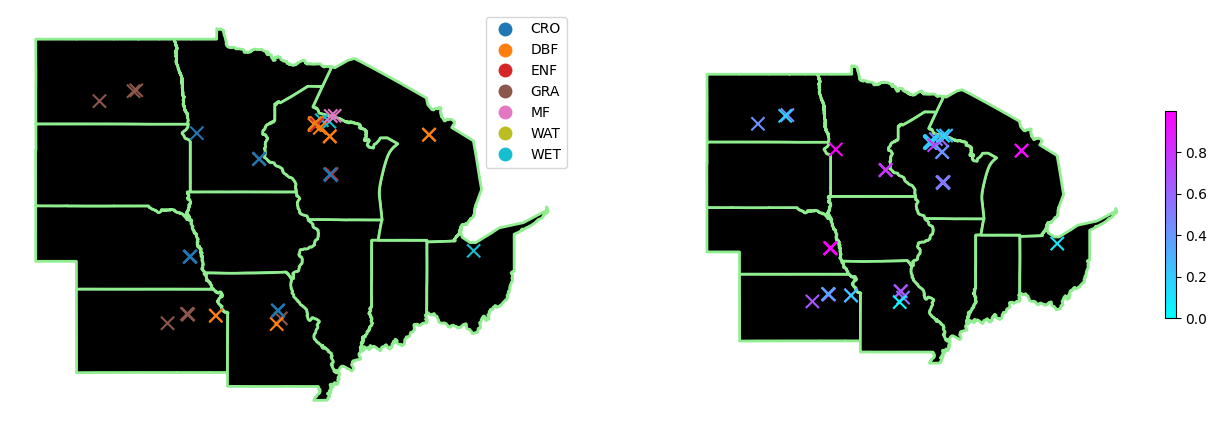

In [26]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
shape.plot(color='black', edgecolor="lightgreen", lw=2, ax=ax[0])
df.plot(ax=ax[0], column='IGBP', marker='x', s=90, legend=True)
ax[0].set_facecolor('lightgreen')
ax[0].axis('off')

shape.plot(color='black', edgecolor="lightgreen", lw=2, ax=ax[1])
df.plot(ax=ax[1], column='QC_NEE', marker='x', s=90, legend=True, cmap='cool',legend_kwds={'shrink': 0.3})
ax[1].set_facecolor('lightgreen')
ax[1].axis('off')

#plt.title(f'AmeriFlux Sites (US Upper Midwest)', fontproperties=prop, fontsize=26) 
plt.savefig('AmeriFluxMap.png', pad_inches=0)
plt.show()

# Footpring Variables

In [53]:
df = pd.read_csv('./Data/AmeriFlux_SiteList.tsv', sep='\t')
df['geometry'] = df.apply(lambda row: Point(row['Longitude (degrees)'], row['Latitude (degrees)']), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')
df.crs = shape.crs
df

,Site ID,Name,Principal Investigator,Data Use Policy,AmeriFlux BASE Data,AmeriFlux FLUXNET Data,Vegetation Abbreviation (IGBP),Vegetation Description (IGBP),Climate Class Abbreviation (Koeppen),Climate Class Description (Koeppen),Mean Average Precipitation (mm),Mean Average Temperature (degrees C),Country,Latitude (degrees),Longitude (degrees),Elevation (m),Years of AmeriFlux BASE Data,AmeriFlux BASE DOI,Years of AmeriFlux FLUXNET Data,AmeriFlux FLUXNET DOI,Site Start,Site End,BASE variables available,FLUXNET variables available,geometry
0,AR-Bal,Balcarce BA,Natalia Edith Tonti (ntonti@at.fcen.uba.ar),Legacy,Yes,No,CRO,Croplands: Lands covered with temporary crops ...,Cfb,"Marine West Coast: mild with no dry season, wa...",926.00,14.00,Argentina,-37.7596,-58.3024,130.000,"2012, 2013",https://doi.org/10.17190/AMF/2315764,NaN,https://doi.org/,2012,2013.0,"CO2, CO2_SIGMA, FC, FC_SSITC_TEST, G, H, H2O, ...",NaN,POINT (-58.3024 -37.7596)
1,AR-Cel,CELPA Mar Chiquita BA,Paulina Martinetto (pmartin@mdp.edu.ar),Legacy,Yes,No,WET,Permanent Wetlands: Lands with a permanent mix...,Cfb,"Marine West Coast: mild with no dry season, wa...",926.00,14.00,Argentina,-37.7028,-57.4192,1.000,2018,https://doi.org/10.17190/AMF/2204054,NaN,https://doi.org/,2018,2018.0,"CO2, CO2_SIGMA, FC, FC_SSITC_TEST, G, H, H2O, ...",NaN,POINT (-57.4192 -37.7028)
2,AR-Rom,Romano Mar Chiquita BA,Natalia Edith Tonti (ntonti@at.fcen.uba.ar),Legacy,Yes,No,WET,Permanent Wetlands: Lands with a permanent mix...,Cfb,"Marine West Coast: mild with no dry season, wa...",926.00,14.00,Argentina,-37.5508,-57.2972,1.000,"2014, 2015",https://doi.org/10.17190/AMF/2315765,NaN,https://doi.org/,2014,2015.0,"CO2, CO2_SIGMA, FC, FC_SSITC_TEST, G, H, H2O, ...",NaN,POINT (-57.2972 -37.5508)
3,BR-CST,Caatinga Serra Talhada,Antonio Antonino (acdantonino@gmail.com),CC-BY-4.0,Yes,Yes,DNF,Deciduous Needleleaf Forests: Lands dominated ...,Bsh,Steppe: very cold winter,642.00,25.20,Brazil,-7.9682,-38.3842,468.000,"2014, 2015",https://doi.org/10.17190/AMF/1562386,"2014, 2015",https://doi.org/10.17190/AMF/1902820,2014,NaN,"APAR, CO2, FC, FETCH_90, GPP, H, H2O, H_SSITC_...",NaN,POINT (-38.3842 -7.9682)
4,BR-Sa1,Santarem-Km67-Primary Forest,Scott Saleska (saleska@email.arizona.edu),CC-BY-4.0,Yes,No,EBF,Evergreen Broadleaf Forests: Lands dominated b...,Am,Tropical monsoon,2074.79,26.13,Brazil,-2.8567,-54.9589,88.000,"2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009...",https://doi.org/10.17190/AMF/1245994,NaN,https://doi.org/,2002,NaN,"CO2, FC, H, H2O, LE, NEE, NETRAD, PA, PPFD_IN,...",NaN,POINT (-54.9589 -2.8567)
5,BR-Sa3,Santarem-Km83-Logged Forest,Mike Goulden (mgoulden@uci.edu),CC-BY-4.0,Yes,No,EBF,Evergreen Broadleaf Forests: Lands dominated b...,Am,Tropical monsoon,2043.77,26.12,Brazil,-3.0180,-54.9714,100.000,"2000, 2001, 2002, 2003, 2004",https://doi.org/10.17190/AMF/1245995,NaN,https://doi.org/,2000,2003.0,"CO2, FC, G, H, H2O, LE, LW_IN, LW_OUT, NEE, NE...",NaN,POINT (-54.9714 -3.018)
6,CA-BOU,Bouleau Peatland,Michelle Garneau (garneau.michelle@uqam.ca),CC-BY-4.0,Yes,No,WET,Permanent Wetlands: Lands with a permanent mix...,Cwc,"Temperate Highland: dry winter, cool summer",1011.00,1.50,Canada,50.5244,-63.2064,108.000,"2018, 2019, 2020",https://doi.org/10.17190/AMF/1987599,NaN,https://doi.org/,2018,2020.0,"ALB, CH4, CO2, CO2_MIXING_RATIO, FC, FCH4, FCH...",NaN,POINT (-63.2064 50.5244)
7,CA-Ca1,British Columbia - 1949 Douglas-fir stand,T. Andrew Black (andrew.black@ubc.ca),CC-BY-4.0,Yes,Yes,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Cfb,"Marine West Coast: mild with no dry season, wa...",1369.00,9.93,Canada,49.8673,-125.3336,300.000,"1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003...",https://doi.org/10.17190/AMF/1480300,"1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003...",https://doi.org/10.17190/AMF/2007163,1997,NaN,"CO2, FC, G, GPP, H, H2O, LE, LW_IN, LW_OUT, NE...",NaN,POINT (-125.3336 49.8673)
8,CA-Ca2,British Columbia - Clearcut Douglas-fir stand ...,T. Andrew Black (andrew.black@ubc

In [64]:
ffp_vars = ['MO_LENGTH', 'USTAR', 'V_SIGMA', 'H', 'NEE', 'TA', 'ZL', 'WD', 'WS']
#ffp_vars = ['MO_LENGTH', 'USTAR', 'V_SIGMA', 'WS']
sites, years = [], []
for i in range(len(df)):
    args = []
    Vars = df.loc[i, 'BASE variables available'].split(', ')
    for v in Vars:
        for ffp in ffp_vars:
            if v==ffp:
                #print(v)
                args.append(v)
    #print(args)
    if len(args)==len(ffp_vars) and df.loc[i, 'Vegetation Abbreviation (IGBP)'] in ['ENF', 'EBF', 'DNF', 'DBF', 'MF']:
        print(df.loc[i, 'Site ID'], df.loc[i, 'Vegetation Abbreviation (IGBP)'], df.loc[i, 'Years of AmeriFlux BASE Data'])
        sites.append(df.loc[i, 'Site ID'])
        years.append(df.loc[i, 'Years of AmeriFlux BASE Data'].split(', '))
years = np.array([year for sub_year in years for year in sub_year]).flatten()

CA-HPC ENF 2018
CA-SCC ENF 2013, 2014, 2015, 2016
CA-SMC ENF 2018
CL-SDF EBF 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
US-CRK ENF 2022, 2023
US-NC1 ENF 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012
US-NC2 ENF 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024
US-NC3 ENF 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021
US-Oho DBF 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013
US-PFb ENF 2019
US-PFc DBF 2019
US-PFg ENF 2019
US-PFh ENF 2019
US-PFi DBF 2019
US-PFj DBF 2019
US-PFk DBF 2019
US-PFL DBF 2019
US-PFm DBF 2019
US-PFn DBF 2019
US-PFp DBF 2019
US-PFq DBF 2019
US-PFs DBF 2019
US-PFt ENF 2019


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [47]:
df[(df['Site ID'].isin(sites))&(df['Vegetation Abbreviation (IGBP)']=='DBF')]

,Site ID,Name,Principal Investigator,Data Use Policy,AmeriFlux BASE Data,AmeriFlux FLUXNET Data,Vegetation Abbreviation (IGBP),Vegetation Description (IGBP),Climate Class Abbreviation (Koeppen),Climate Class Description (Koeppen),Mean Average Precipitation (mm),Mean Average Temperature (degrees C),Country,Latitude (degrees),Longitude (degrees),Elevation (m),Years of AmeriFlux BASE Data,AmeriFlux BASE DOI,Years of AmeriFlux FLUXNET Data,AmeriFlux FLUXNET DOI,Site Start,Site End,BASE variables available,FLUXNET variables available,geometry
24,US-Oho,Oak Openings,Jiquan Chen (jqchen@msu.edu),CC-BY-4.0,Yes,Yes,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfa,"Humid Continental: humid with severe winter, n...",849.0,10.10,USA,41.5545,-83.8438,230.0,"2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011...",https://doi.org/10.17190/AMF/1246089,"2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011...",https://doi.org/10.17190/AMF/2229385,2004,2013.0,"CO2, FC, G, H, H2O, LE, LW_IN, LW_OUT, MO_LENG...",NaN,POINT (-83.8438 41.5545)
29,US-PFc,NW2 Aspen-1 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9677,-90.3088,473.0,2019,https://doi.org/10.17190/AMF/1717851,NaN,https://doi.org/,2019,2019.0,"CO2, FC, FC_SSITC_TEST, G, H, H_SSITC_TEST, LE...",NaN,POINT (-90.3088 45.9677)
34,US-PFi,NE3 Hardwood-1 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9749,-90.2327,488.0,2019,https://doi.org/10.17190/AMF/1717856,NaN,https://doi.org/,2019,2019.0,"CO2, FC, FC_SSITC_TEST, G, H, H_SSITC_TEST, LE...",NaN,POINT (-90.2327 45.9749)
35,US-PFj,NE4 Maple-1 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9619,-90.2270,484.0,2019,https://doi.org/10.17190/AMF/1717857,NaN,https://doi.org/,2019,2019.0,"CO2, FC, FC_SSITC_TEST, G, H, H_SSITC_TEST, LE...",NaN,POINT (-90.227 45.9619)
36,US-PFk,SW1 Aspen-2 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9149,-90.3425,476.0,2019,https://doi.org/10.17190/AMF/1717858,NaN,https://doi.org/,2019,2019.0,"CO2, FC, FC_SSITC_TEST, G, H, H_SSITC_TEST, LE...",NaN,POINT (-90.3425 45.9149)
37,US-PFL,SW2 Aspen-3 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9409,-90.3177,464.0,2019,https://doi.org/10.17190/AMF/1717859,NaN,https://doi.org/,2019,2019.0,"CO2, FC, FC_SSITC_TEST, G, H, H_SSITC_TEST, LE...",NaN,POINT (-90.3177 45.9409)
38,US-PFm,SW3 Hardwood-2 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9207,-90.3099,484.0,2019,https://doi.org/10.17190/AMF/1717860,NaN,https://doi.org/,2019,2019.0,"CO2, FC, FC_SSITC_TEST, G, H, H_SSITC_TEST, LE...",NaN,POINT (-90.3099 45.9207)
39,US-PFn,SW4 Hardwood-3 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9392,-90.2823,478.0,2019,https://doi.org/10.17190/AMF/1717861,NaN,https://doi.org/,2019,2019.0,"CO2, FC, FC_SSITC_TEST, G, H, H_SSITC_TEST, LE...",NaN,POINT (-90.2823 45.9392)
40,US-PFp,SE2 Hardwood-4 CHEESEHEAD 2019,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Dfb,Warm Summer Continental: significant precipita...,823.0,4.33,USA,45.9365,-90.26

In [21]:
df = df[df['Site ID'].isin(sites)].reset_index(drop=True)
df.to_csv('./Data/FP_sites.csv',index=None)

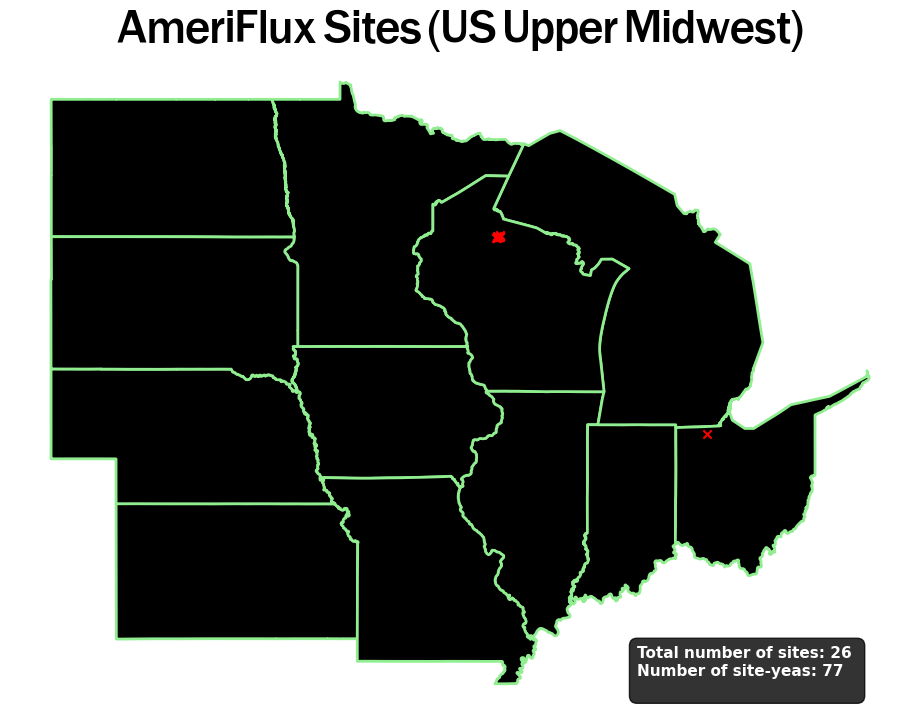

In [44]:
fig, ax = plt.subplots(figsize=(9,9))
shape.plot(color='black', edgecolor="lightgreen", lw=2, ax=ax)
df[(df['Site ID'].isin(sites))&(df['Vegetation Abbreviation (IGBP)']=='DBF')].plot(ax=ax, color='r', marker='x')
ax.set_facecolor('lightgreen')
text = ax.text(-86, 35.8, "", ha='left', fontsize=11, color='white', fontweight='bold',
        bbox=dict(facecolor='black', alpha=0.8, edgecolor='black',boxstyle='round,pad=0.5'))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 12, wspace = 0)
info_text = (
        f"Total number of sites: {len(sites)} \n"
        f"Number of site-yeas: {len(years)} \n"
        # f"Forests: {forests}\n"
        # f"Croplands: {cro}\n"
        # f"Aquatic: {aqua}\n"
        # f"Grass&Shrub: {gsh}"
    )
text.set_text(info_text)
ax.axis('off')
ax.set_title(f'AmeriFlux Sites (US Upper Midwest)', fontproperties=prop, fontsize=30) 
plt.savefig('Footrping_sites.png', pad_inches=0)
plt.show()

In [9]:
pd.read_csv('/home/aleksei/Documents/GEMS/Footprint/Data/AmeriFlux/Raw/AMF_US-PFg_BASE_HH_1-5.csv',skiprows=(0,1))

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,CO2_1_1_1,LE_1_1_1,H_1_1_1,USTAR_1_1_1,TAU_1_1_1,G_1_1_1,SG_1_1_1,...,NEE_PI_1_1_1,SC_1_1_1,SH_1_1_1,SLE_1_1_1,TAU_SSITC_TEST_1_1_1,H_SSITC_TEST_1_1_1,LE_SSITC_TEST_1_1_1,FC_SSITC_TEST_1_1_1,MO_LENGTH_1_1_1,ZL_1_1_1
0,201901010000,201901010030,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
1,201901010030,201901010100,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
2,201901010100,201901010130,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
3,201901010130,201901010200,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
4,201901010200,201901010230,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14587,201910312130,201910312200,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
14588,201910312200,201910312230,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
14589,201910312230,201910312300,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
14590,201910312300,201910312330,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0
